In [13]:
import pandas as pd
import seaborn as sns
import random

from Bio import SeqIO

In [14]:
path = "../outputs/salad-irg/metaMDBG/metabat2_bins_additional_reads_cobinning_alignement/checkm_report.txt"
bin_prefix = "../outputs/salad-irg/metaMDBG/metabat2_bins_additional_reads_cobinning_alignement/bins/"

criteria = ["Bin ID", "Completeness", "Contamination", "Contigs","Size", "N50", "N50/Size"]
x_criteria = 1
y_criteria = 2

def GSCS_quality(contamination, completeness, contigs, size) : 
    if ((contamination <=1) and (completeness >=99) and (contigs <=1)) : 
        return "near complete"   
    if ((contamination <=5) and (completeness >=90)) :
        return "high quality"     
    if ((contamination <=10) and (completeness >=50)) :
        return "medium quality"   
    return "low quality"



In [15]:
bins = pd.read_csv(path, delim_whitespace=True, skiprows=6, 
    names = ["Bin ID", "Marker", "lineage", "genomes", "markers", "sets", "0", "1", "2", "3", "4", "5+", 
             "Completeness", "Contamination", "Strain hetero", "Contigs", "Size", "N50", "N50/Size"])

bins = bins[criteria]
bins.sort_values([criteria[x_criteria], criteria[y_criteria]], inplace = True)


bins["Quality"] = bins.apply(lambda x: GSCS_quality(x['Contamination'], x['Completeness'], x['Contigs'], x['Size']), axis=1)

bins

/tmp/ipykernel_64258/1162890281.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bins = pd.read_csv(path, delim_whitespace=True, skiprows=6,


,Bin ID,Completeness,Contamination,Contigs,Size,N50,N50/Size,Quality
0,bin.1,0.0,0.00,48,339105.0,7574.0,0.022335,low quality
2,bin.100,0.0,0.00,28,211961.0,9633.0,0.045447,low quality
7,bin.105,0.0,0.00,28,226981.0,9753.0,0.042968,low quality
9,bin.107,0.0,0.00,30,251926.0,8318.0,0.033018,low quality
11,bin.109,0.0,0.00,92,569495.0,8008.0,0.014062,low quality
...,...,...,...,...,...,...,...,...
536,bin.582,100.0,409.64,1347,18155577.0,18075.0,0.000996,low quality
254,bin.328,100.0,745.03,4309,30002989.0,7886.0,0.000263,low quality
288,bin.359,100.0,1898.56,21159,117285195.0,6003.0,0.000051,low quality
513,bin.561,100.0,2468.40,34383,196528225.0,6200.0,0.000032,low quality


(0.0, 100.0)

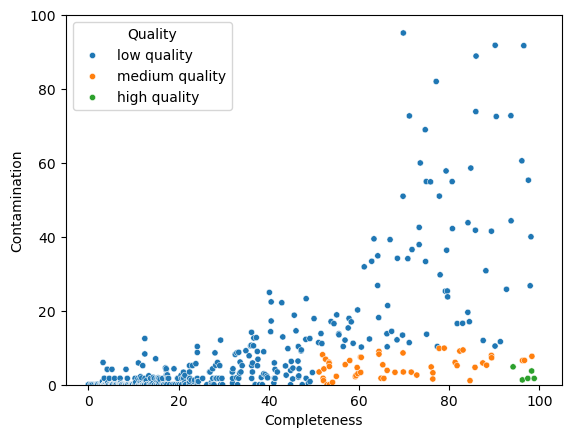

In [17]:
plot = sns.scatterplot(data=bins, 
        x=criteria[x_criteria], y=criteria[y_criteria], hue='Quality', 
         s=20, alpha=1)
plot.set_ylim(0,100)

In [ ]:
# Select random bins
print(bins[bins["Quality"] == "high quality"].sample(5)["Bin ID"])
print(bins[bins["Quality"] == "medium quality"].sample(5)["Bin ID"])
print(bins[bins["Quality"] == "low quality"].sample(5)["Bin ID"])

173    bin.255
323    bin.390
192    bin.272
230    bin.306
15     bin.112
Name: Bin ID, dtype: object
58     bin.151
135    bin.220
264    bin.337
340     bin.48
396     bin.99
Name: Bin ID, dtype: object
112     bin.20
19     bin.116
3      bin.101
198    bin.278
213    bin.291
Name: Bin ID, dtype: object


In [ ]:
# Print random contigs from target bin
target_contigs = []
with open(bin_prefix + "bin.300" + ".fa", "r") as fasta_file :
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence = str(record.seq)
        tmp = [">" + record.name]
        tmp.append(sequence[0:min(5000, len(sequence))])
        target_contigs.append(tmp)

  
random.shuffle(target_contigs) 

for i in target_contigs : 
    for j in i : 
        print(j)


>ctg875990_1x_l
ACGGGGTGGGTGAGACCGAGACGTTGCGCGCCAAGCGCACGACCGACTGGTGGAAATGACCCAGCCGGCCGGCACGGACTGGGGGCTTGGCACGGAGGTGCGCTCGAGGGCCTTGGCTGAGCGACGGCGAGAACGCAGAGCTCCTCTATCGTGAGGCAATCGAGCGGTTCGGCCGGACCGGGCTACGTCCCGAGCTCGCCCGCGCGCATCTGCTCTACGGGGAGTGGCTGCGGCGCGAGGGGCGACGAAGCGGCGCACGCGAGCAGCTTCGTACGGCGCACCACATGTTTGCCGCCATCGGAATGGAGGCGTTCGCCGAGCGCACGCGCCGAGAGCTGGTCGCGACGGGCGAGACCGTCCGAAAGCGCAGTGCTGAGACACGCGACGAGCTCACCCCCCAAGAAGAGCAGATTGTCCGACTCGCGCGCGATGGTCTCTCGAATCCGGAGATCGCTGCAGAGCTCTTCTTGAGCTCCCGCACCGTCGAATGGCATCTCCGCAAGGGTCTACATGAAGCTCGGAATCAGCTCTCGTCGAGAGCTCTGGGCAGCGTCCGCGCGGCCAGCGGGGCTCCTAGTCGGCCCAGTAGTAGCGCGAGCGGGGACACCGGCCACGGTGCCGGGCTCGCGCACGCGTGCGTCGAGACCCCCACCCGCGCGCGAGTGGCCAGGACCTTCGACCCCGACCAGTGTGCGCCACGGGCCCACACCAGGGTCTGCACTGGCGCGAACGAGTCCCATAGTCGGCGAGCCTGTGCTTCCTGCAGAAACCGTTCGGAGTGGTTCGTGACGCGACCCAGGGCAGCCGCAGGTTCCGGGGGATCGACCGGTGCCCATCGAGTGCCCTGCACGATGAAGGGAGGAAGCCATGAGAGCCCCGTGAAACGCTGCTGGCCGCAGGGGATCATGCTGGCGATCTCGGCGGTGACGACCTTGCCGCGGCGATCACAACTGTATGAGGTGGACCATGGTCGCGTTCAGCGGA